# Milestone 5: Exploratory Analysis - Multivariate Analysis

In [1]:
import os
import sys

def add_parent_directory_to_path():
    parent_dir = os.path.abspath('..')
    sys.path.append(parent_dir)

add_parent_directory_to_path()

In [2]:
# Interactive development environments (IDEs) and notebooks
import jupyterlab as jl
from ipywidgets import interact

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import folium as fm
import plotly as py
from colorama import Fore, Style

# Data manipulation libraries
import numpy as np
import pandas as pd

# Statistical modeling libraries
import statsmodels as sm
import sklearn as sk

In [3]:
from srcs.toolbox import load_dataset, calculate_mean

dataset_file = "../data/cleaned_data.csv"
df = load_dataset(dataset_file, "\t")

## 1.1. PCA - Principal Component Analysis

In [4]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#### 1.1.1. Scree Plot

In [5]:

# select numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
numerical_features = numerical_features.drop('code')
numerical_features.shape[0]

# features = numerical_features.append(pd.Index('nutrition_grade_fr'))
# index = numerical_features.append(pd.Index(['nutrition_grade_fr']))
index = numerical_features.drop(['nutrition-score-fr_100g', 'fiber_100g', 'vitamin-c_100g', 'vitamin-a_100g'])
# features = features.drop(['categories_fr','code', 'countries_fr', 'main_category_fr', 'pnns_groups_1', 'pnns_groups_2', 'product_name', 'nutrition-score-fr_100g', 'calcium_100g'])
index = ['calcium_100g', 'carbohydrates_100g', 'energy_100g', 'fat_100g', 'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sugars_100g', 'trans-fat_100g']


In [6]:
# scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[index])
scaled_data

array([[-0.79213726,  1.62224703,  1.06339685, ...,  1.33310022,
        -0.46708271, -0.31376693],
       [-0.61118731, -0.63758724, -1.22151423, ..., -0.72917399,
        -0.04034027, -0.31376693],
       [-0.61118731, -0.63758724, -1.22151423, ..., -0.72917399,
        -0.04034027, -0.31376693],
       ...,
       [-0.61118731, -0.64517058, -1.20142416, ..., -0.72917399,
        -0.11677175, -0.31376693],
       [ 1.56021212,  1.80424711,  0.74195567, ..., -0.63018483,
        -0.5371449 , -0.31376693],
       [-0.61118731, -1.01296239, -1.430451  , ..., -0.6961776 ,
        -0.67089999, -0.31376693]])

In [7]:
pca = PCA(n_components=3)
pca.fit(scaled_data)

PCA(n_components=3)

In [8]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.30483333, 0.25190673, 0.17609959])

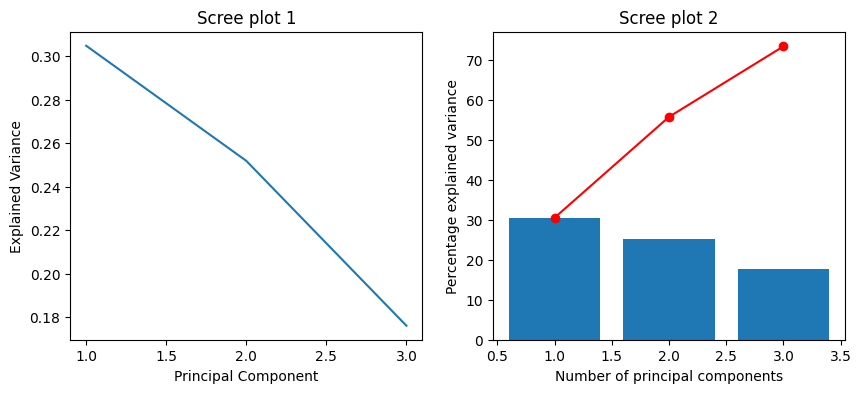

In [9]:
import matplotlib.pyplot as plt

# Create figure with 2 subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Create scree plot
ax1.plot(range(1,len(explained_variance)+1), explained_variance)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance')
ax1.set_title("Scree plot 1")

# Create bar plot
scree = pca.explained_variance_ratio_*100
ax2.bar(np.arange(len(scree))+1, scree)
ax2.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
ax2.set_xlabel("Number of principal components")
ax2.set_ylabel("Percentage explained variance")
ax2.set_title("Scree plot 2")

# Show the figure
plt.show()


## Understanding the Variance Explained by Principal Components in PCA

Analyzing the Variance Explained by Each Principal Component:

- `The first principal component` is the one that explains the most variation in the data `(24.17%)` and suggests a strong correlation between the features that make up this component. 

- `The second principal component` also explains a relatively large proportion of the variation `(21.62%)` and captures important information not captured by the first component. 

- `The third and fourth principal components` explain `19.60%` and `10.00%` of the total variation, respectively, and still contribute to the overall explanation of the data.

**Conclusion** `The first 2 principal components` can explain `45.79%` of the total variation in the data, which means they capture most of the important information present in the data, making PCA useful in reducing the dimensionality while still retaining the information.

#### 1.1.2. Correlation Circle

In [10]:
pcs = pca.components_ 


In [11]:
from srcs.toolbox import display_circles

In [12]:
numerical_features

Index(['calcium_100g', 'carbohydrates_100g', 'cholesterol_100g', 'energy_100g',
       'fat_100g', 'fiber_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'proteins_100g', 'salt_100g', 'saturated-fat_100g', 'sodium_100g',
       'sugars_100g', 'trans-fat_100g', 'vitamin-a_100g', 'vitamin-c_100g'],
      dtype='object')

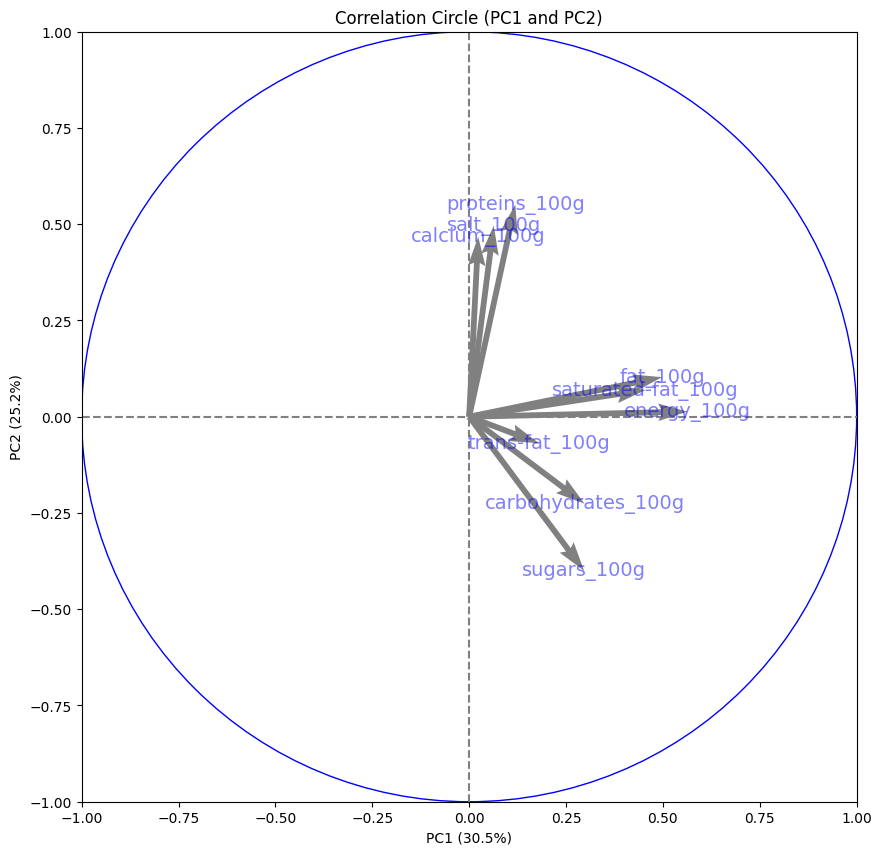

In [14]:
display_circles(pcs, 3, pca, [(0,1)], labels = np.array(index),) 

It is clearly noticeable that the energy variable is strongly linked to component 1 and that it is strongly correlated with fats (fat, saturated-fat), this can be seen because the angle is very small. This is consistent with our previous analysis using the correlation heatmap.

Another thing is also noticeable, which is a nearly 90-degree angle between energy and proteins. This means that there is no or very little correlation between energy and proteins. This is also consistent with what we found in our correlation heatmap."

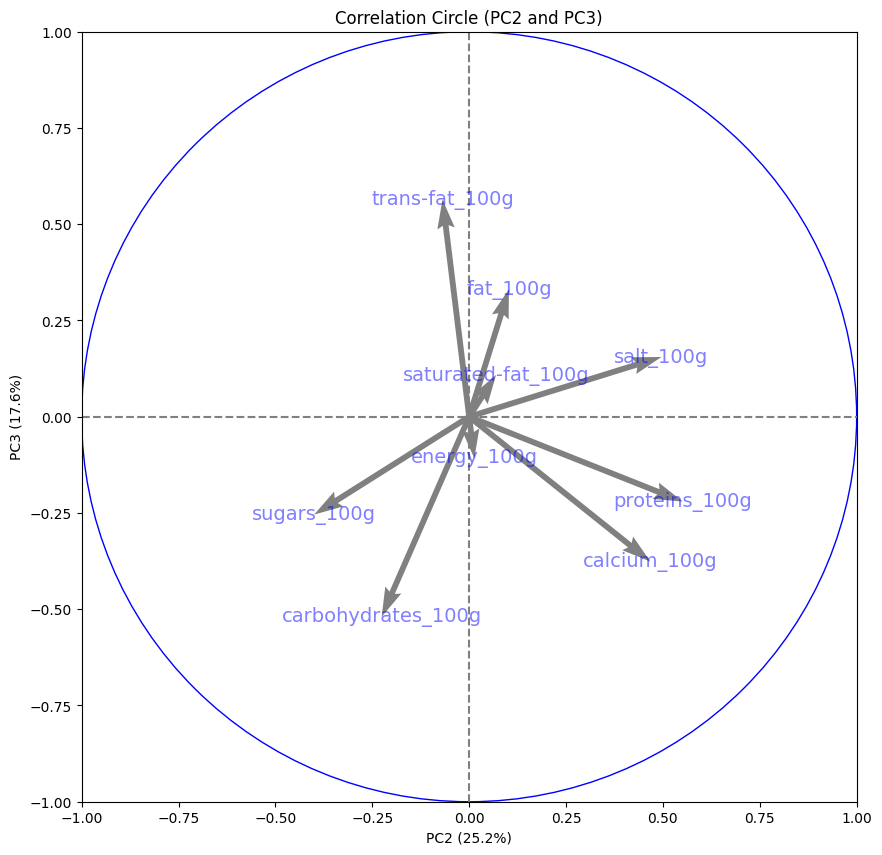

In [15]:
display_circles(pcs, 4, pca, [(1,2)], labels = np.array(index),) 

It can be seen with compounds 2 and 3: several oppositions. Notably between sugar / salty and between fat and carbohydrates. This means that when one decreases, the other increases."

The analysis of the variables factor map is showing that there are several opposing relationships between certain variables, in this case between "sugar/salty" and between "fat and carbohydrates". This indicates that when the level of one variable decreases, the level of the other variable increases, and vice versa. In other words, there is an inverse relationship between the two variables, such that an increase in one is associated with a decrease in the other.

In [16]:
# Import the sklearn function
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df[numerical_features])
X_scaled

array([[-0.79213726,  1.62224703, -0.34930033, ..., -0.31376693,
        -0.14616486, -0.23984372],
       [-0.61118731, -0.63758724, -0.34930033, ..., -0.31376693,
        -0.03751013,  0.09433159],
       [-0.61118731, -0.63758724, -0.34930033, ..., -0.31376693,
        -0.03751013,  0.09433159],
       ...,
       [-0.61118731, -0.64517058, -0.34930033, ..., -0.31376693,
        -0.03751013,  0.30650639],
       [ 1.56021212,  1.80424711, -0.34930033, ..., -0.31376693,
        -0.68943849,  2.4812981 ],
       [-0.61118731, -1.01296239, -0.34930033, ..., -0.31376693,
        -0.03751013,  0.09433159]])

#### 1.1.3. Individuals Projection

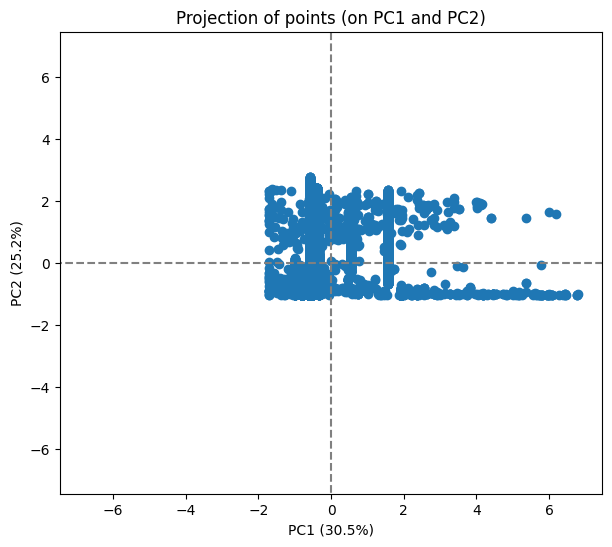

In [17]:
from srcs.toolbox import display_factorial_planes

# Transform the original scaled data to the new vector space
X_projected = pca.transform(scaled_data) 

# Display a scatter plot of the data points in this new vector space
display_factorial_planes(scaled_data, 3, pca, [(0,1)])
plt.show()


## 1.2. ANOVA

#### 1.2.1. Correlation between Numerical and Categorical Feature

In [18]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [19]:
df['proteins_100g'].describe()

count    34607.000000
mean         7.104779
std          6.390663
min          0.000000
25%          2.000000
50%          6.000000
75%          9.800000
max         34.000000
Name: proteins_100g, dtype: float64

In [20]:
from scipy import stats
F, p = stats.f_oneway(df[df['nutrition_grade_fr'] == 'a']['proteins_100g'],
df[df['nutrition_grade_fr'] == 'b']['proteins_100g'],
df[df['nutrition_grade_fr'] == 'c']['proteins_100g'],
df[df['nutrition_grade_fr'] == 'd']['proteins_100g'],
df[df['nutrition_grade_fr'] == 'e']['proteins_100g'])
print('ANOVA test for mean proteins')
print('F Statistic:', F, '\tp-value:', p)

ANOVA test for mean proteins
F Statistic: 182.71131504741737 	p-value: 3.401964690233302e-155


This p-value is incredibly small, which means we can reject H0 and conclude that the true mean proteins are not the same for all five nutrition grade.


In [21]:
import scipy as sp

group_a = df[df.nutrition_grade_fr == 'a']['proteins_100g']
group_b = df[df.nutrition_grade_fr == 'b']['proteins_100g']
group_c = df[df.nutrition_grade_fr == 'c']['proteins_100g']
group_d = df[df.nutrition_grade_fr == 'd']['proteins_100g']
group_e = df[df.nutrition_grade_fr == 'e']['proteins_100g']

a_mean = group_a.mean()
b_mean = group_b.mean()
c_mean = group_c.mean()
d_mean = group_d.mean()
e_mean = group_e.mean()
print(f"{a_mean}, {b_mean}, {c_mean}, {d_mean}, {e_mean}")

grand_mean = (a_mean+b_mean+c_mean+d_mean+e_mean)/5

SST = len(group_a)*(a_mean-grand_mean)**2\
      +len(group_b)*(b_mean-grand_mean)**2\
      +len(group_c)*(c_mean-grand_mean)**2\
      +len(group_d)*(d_mean-grand_mean)**2\
      +len(group_e)*(e_mean-grand_mean)**2
MST = SST/2

SSE = (len(group_a)-1)*group_a.var(ddof=1)\
      +(len(group_b)-1)*group_b.var(ddof=1)\
      +(len(group_c)-1)*group_c.var(ddof=1)\
      +(len(group_d)-1)*group_d.var(ddof=1)\
      +(len(group_e)-1)*group_e.var(ddof=1)
n = len(group_a) + len(group_b) + len(group_c) + len(group_d) + len(group_e)
k = 5
MSE = SSE/(n-k)

F = MST/MSE
print('F-statistic: {}'.format(F))
print('p-value: {}'.format(1 - sp.stats.f.cdf(F, 4, n-k)))

6.815703558658266, 6.110121973001038, 6.617082208029197, 8.605103734129946, 6.670163116432961
F-statistic: 378.0810570894848
p-value: 1.1102230246251565e-16


The value 1.1102230246251565e-16, expressed as a p-value, is extremely small. This suggests that the differences between the means of the groups are statistically significant.

#### 1.2.2. Statistical Test (Optional)